Bonded Simple Cubic Lattice
============================

This example demonstrates how to construct a lattice with simple cubic unit cells of Mechanica objects 
and stimulate it with a periodic external perturbation.

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/tjsego/mechanica-binder/HEAD?filepath=notebooks%2Fbonded_sc_lattice.ipynb)

Basic Setup
------------

Begin by initializing Mechanica with an explicit timestep and declare a lattice spacing constant by which 
all spatial aspects should be defined. 

In [1]:
import os
import mechanica as mx
import numpy as np

mx.init(dt=0.1, dim=[15, 12, 10])

# lattice spacing
a = 0.65

Particle Types
---------------

Declare three particle types to designate roles of particles in the lattice, 

- A basic particle type for particles in the lattice
- A particle type to which an external stimulus is applied
- A particle type that is fixed in space to serve as the base of the lattice

In [2]:
class AType(mx.ParticleType):
    """A basic particle type for particles in the lattice"""
    radius = 0.3
    style = {"color": "seagreen"}
    dynamics = mx.Overdamped


A = AType.get()


class BType(mx.ParticleType):
    """A particle type to which an external stimulus is applied"""
    radius = 0.3
    style = {"color": "red"}
    dynamics = mx.Overdamped


B = BType.get()


class FixedType(mx.ParticleType):
    """A particle type that is fixed in space to serve as the base of the lattice"""
    radius = 0.3
    style = {"color": "blue"}
    frozen = True


Fixed = FixedType.get()

Symmetric Repulsive Interaction
--------------------------------

Particles in the lattice will be bound with their neighbors using bonds. 
Implement a repulsive potential to put some tension in the bonds of the lattice. 

In [3]:
repulse = mx.Potential.coulomb(q=0.08, min=0.01, max=2 * a)

mx.bind.types(repulse, A, A)
mx.bind.types(repulse, A, B)

0

External Stimulus
------------------

Create a periodic force and apply it to the lattice. 

In [4]:
f = mx.ConstantForce(lambda: [0.3, 1 * np.sin(0.4 * mx.Universe.time), 0], 0.01)

mx.bind.force(f, B)

0

Lattice Construction
---------------------

Create a lattice of simple cubic unit cells with bonds like Hookean springs. 

In [5]:
pot = mx.Potential.power(r0=0.5 * a, alpha=2)

uc = mx.lattice.sc(a, A, lambda i, j: mx.Bond.create(pot, i, j, dissociation_energy=100.0))

parts = mx.lattice.create_lattice(uc, [15, 15, 15])

Applying Particle Types
------------------------

Make the right-facing surface of the lattice receive the external stimulus, 
and make the left-facing surface of the lattice be the fixed base. 

In [6]:
for p in parts[14, :].flatten():
    p[0].become(B)

for p in parts[0, :].flatten():
    p[0].become(Fixed)

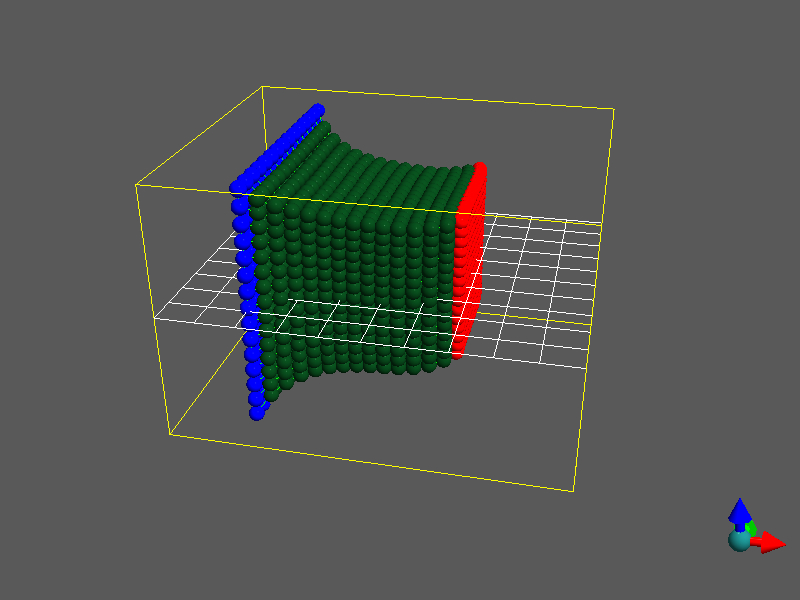

In [7]:
mx.show()